# Here begins the project

In [1]:
tot <- read.csv(file = 'C:/Users/scanu/OneDrive/Desktop/Andrea/Università/Garfa/train.csv')
length(tot)

[1] 3

In [75]:
condprob2[100,]

,vocab,V2,V3,V4,V5,V6,V7
100,"""basically",2.459722e-05,2.321317e-05,2.120171e-05,2.225932e-05,6.67579e-05,2.458029e-05


In [2]:
segmentation = 0.9
dim_tot = dim(tot)[1]

train_dim = round(segmentation*dim_tot, digit = 0)
test_dim = dim_tot - train_dim
train_dim
test_dim

[1] 9216

[1] 1024

In [3]:
train = tot[1:train_dim,]
test = tot[train_dim:dim_tot,]
dim(test)

[1] 1025    3

In [4]:
train_x = train[["Text"]]
train_y = train[["Labels"]]

In [5]:
library(stringr)
vocab = str_split(train_x, " ")
vocab = unlist(vocab, recursive=FALSE)
vocab = unique(vocab)
length(vocab)

[1] 20403

In [ ]:
# vocab = str_split(train_x, " ")
# vocab = unlist(vocab, recursive=FALSE)

In [ ]:
# vocab_half1 = c(vocab, " ")
# vocab_half2 = c(" ", vocab)

# vocab2 = paste(vocab_half2, vocab_half1)
# vocab2 = unique(vocab2)
# vocab2 = vocab2[3:length(vocab2)-1]
# vocab2[1:30]

In [6]:
remove = tolower(list("About","Above","Across","After","Ago","At","Below","By","Down","During","For","From","In","Into","Off",
                      "On","Over","Past","Since","Through","To","Under","Until","Up","With", "the", "That", "of", "a", "and", "is"))
vocab = vocab[! vocab %in% c(remove, "Says")]

length(vocab)

[1] 20371

In [7]:
vocab = vocab[order(vocab)]
length(vocab)

[1] 20371

In [8]:
N = length(train_x)
N

[1] 9216

In [9]:
C = c(1,2,3,4,5,6)
C

[1] 1 2 3 4 5 6

In [20]:


tempi1 = c()

for (i in 900*c(1,2,3,4,5,6,7,8,9,10)){
    

frame = as.data.frame(table(vocab))
frame <- frame[ -2 ]
condprob2 = as.data.frame(table(vocab))
condprob2 <- frame[ -2 ]
train = tot[1:train_dim,]
train = train[1:i,]

a = Sys.time()
for (c in C){
    label = c-1
    train_c = train[which(train$Labels == label), ]
    train_c_x = train_c[["Text"]]
    vocab_c = str_split(train_c_x, " ")
    vocab_c = unlist(vocab_c, recursive=FALSE)
    vocab_c = vocab_c[! vocab_c %in% c(remove, "Says")]
    
    vocab_dummy = c(vocab, vocab_c)
    
    count = as.data.frame(table(vocab_dummy))
    frame[c+1] = count$Freq
    somma = sum(frame[c+1])
    condprob2[c+1] = frame[c+1]/somma 
    
}

prior = c(0.162326388888889, 0.193250868055556, 0.206922743055556, 0.192274305555556, 0.0811631944444444, 0.1640625)
b = Sys.time()
tempi1 = c(tempi1,  round(as.numeric(difftime(time1 = b, time2 = a, units = "secs")), 3) ) 
    }

tempi1

[1] 0.380 0.374 0.372 0.374 0.393 0.372 0.376 0.371 0.441 0.429

In [101]:
N_c = c()
prior = c()

T = c()
condprob = c()


tempi2 = c()

for (i in 900*c(1,2,3,4,5,6,7,8,9,10)){
train = tot[1:train_dim,]
train = train[1:i,]
    
a = Sys.time()

for (c in C) {
    label = c-1
    train_c = train[which(train$Labels == label), ]
    
    train_c_x = train_c[["Text"]]
    vocab_c = str_split(train_c_x, " ")
    vocab_c = unlist(vocab_c, recursive=FALSE)
    
    n_c = dim(train_c)[1]
    
    N_c = c(N_c, n_c)
    prior = c(prior, n_c/N)
    
    T_c = c()
    
    
    for (t in vocab) {
        
    T_c = c(T_c, sum(vocab_c == t))
        
    }

    
    dummy_sum = sum(T_c) + length(T_c)
    
    T = c(T, T_c)
    
    condprob_c = (T_c+1)/dummy_sum
    
    condprob = c(condprob, condprob_c )
    
    
}

# dim(T) = c(length(vocab), length(C))
# dim(condprob) = c(length(vocab), length(C))
prior

b = Sys.time()
    
tempi2 = c(tempi2,  round(as.numeric(difftime(time1 = b, time2 = a, units = "secs")), 3) )   
 }
    
tempi2

[1]  4.874  6.337  6.917  8.654 10.755 12.372 16.561 16.330 17.450 19.437

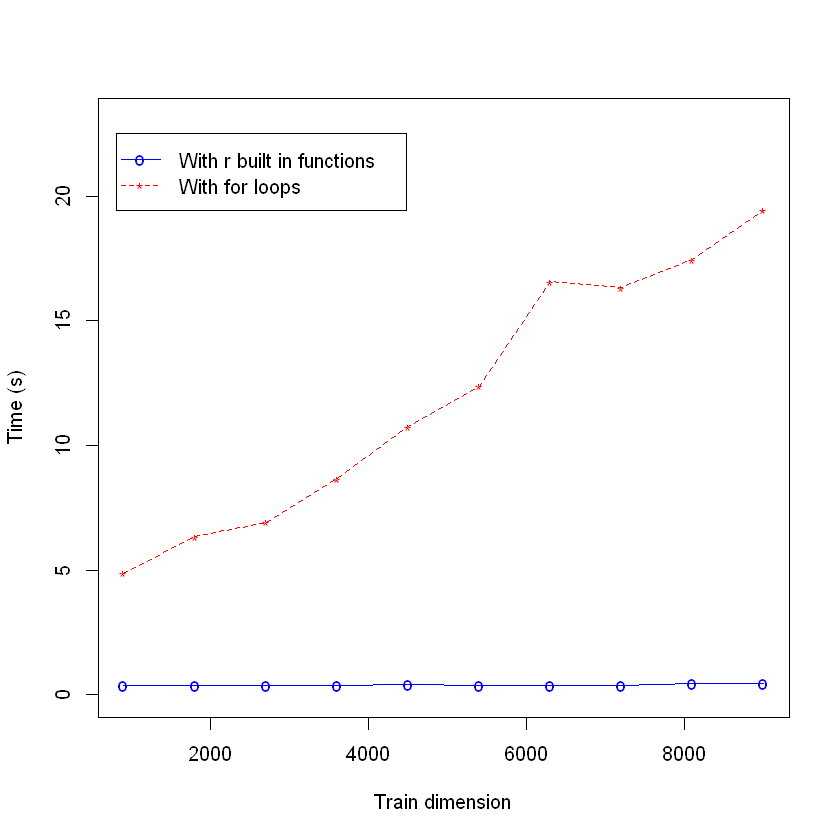

In [105]:
x1 = 900*c(1,2,3,4,5,6,7,8,9,10)
plot(x1, tempi1, type="o", col="blue", pch="o", lty=1, ylim=c(0,23) , xlab = "Train dimension", ylab = "Time (s)")

# Add second curve to the same plot by calling points() and lines()
# Use symbol '*' for points.
 points(x1, tempi2, col="red", pch="*")
 lines(x1, tempi2, col="red",lty=2)

legend(800,22.5,legend=c("With r built in functions","With for loops"), col=c("blue","red"),
                                   pch=c("o","*"),lty=c(1,2), ncol=1)


# Test

In [ ]:
# test = read.csv(file = 'C:/Users/scanu/OneDrive/Desktop/Andrea/Università/Garfa/test.csv')
# dim = dim(test)[1]

In [61]:
test_x = test[["Text"]]
test_y = test[["Labels"]]
dim = dim(test)[1]
dim

[1] 1025

In [63]:
matrix = log(t(data.matrix(condprob2[, 2:7])))
null = matrix(0,length(vocab))
times = c()


In [64]:
vec = 100*1:10
for (h in vec){

a = Sys.time()
fit_y_m = c()


for (t in 1:h){
#     print("start")
    words = str_split(test_x[t], " ")
    words = unlist(words, recursive=FALSE)
    score_t = c()
    
    my.text = null
    
    for (w in words){
        
            if (w %in% vocab){
                
                i = which( vocab == w )
                
                my.text[i] = my.text[i] + 1  
            }
        
        
    }
    
    score_t = matrix %*% my.text + log(prior)
    label = which.max(score_t) - 1
    fit_y_m = c(fit_y_m, label)
    }
b = Sys.time()
time = round(as.numeric(difftime(time1 = b, time2 = a, units = "secs")), 3) 
times = c(times,time)
    }


In [84]:
times2 = c()

In [85]:
for (h in vec){

a = Sys.time()

fit_y = c()
for (t in 1:h){
#     print("start")
    words = str_split(test_x[t], " ")
    words = unlist(words, recursive=FALSE)
    score_t = c()
    
    for (c in C) {
        
        score = log(prior[c])
        for (w in words){
            if (w %in% vocab) {

                score = score + log(as.numeric(condprob2[which(condprob2[,1] == w), c ]))
#                 print(log(condprob[which(condprob[,7] == w), c ]))
            }
        }
        
        score_t = c(score_t, score)
    }
#     print(score_t)
    label = which.max(score_t) - 1
    fit_y = c(fit_y, label)
}

b = Sys.time()
time = round(as.numeric(difftime(time1 = b, time2 = a, units = "secs")), 3) 
times2 = c(times2,time)
    }

In [90]:
times

[1] 0.624 1.022 1.212 1.658 2.158 2.446 2.703 2.787 3.461 3.425

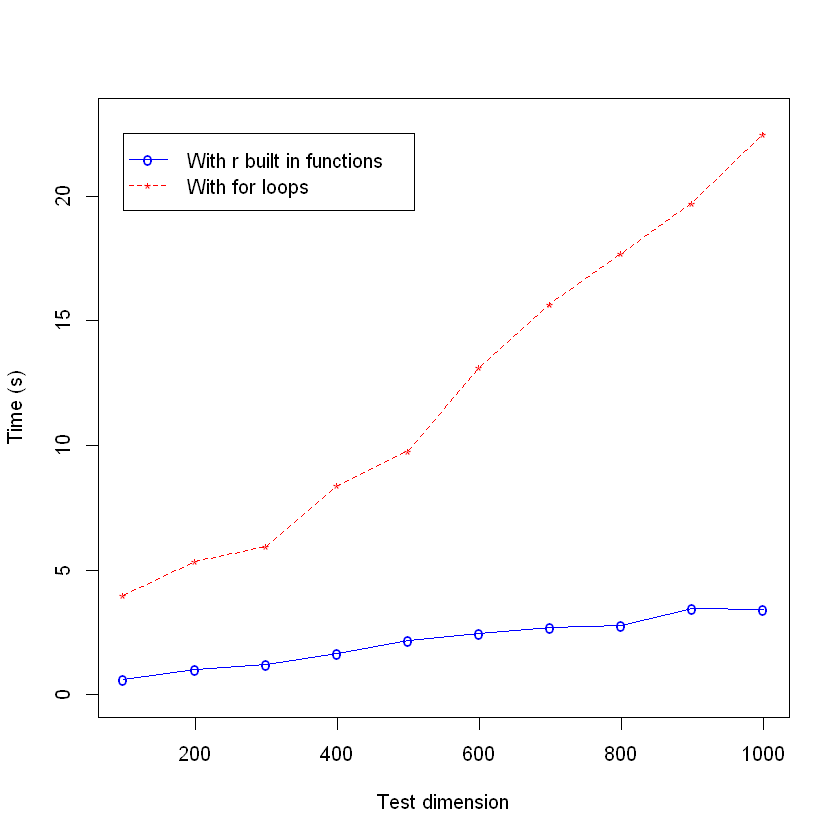

In [106]:
plot(vec, times, type="o", col="blue", pch="o", lty=1, ylim=c(0,23) , xlab = "Test dimension", ylab = "Time (s)")

# Add second curve to the same plot by calling points() and lines()
# Use symbol '*' for points.
 points(vec, times2, col="red", pch="*")
 lines(vec, times2, col="red",lty=2)

legend(100,22.5,legend=c("With r built in functions","With for loops"), col=c("blue","red"),
                                   pch=c("o","*"),lty=c(1,2), ncol=1)

In [62]:
# vec2 = c(1:250, c(251,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000) )

In [65]:
# length(vec2)

[1] 266

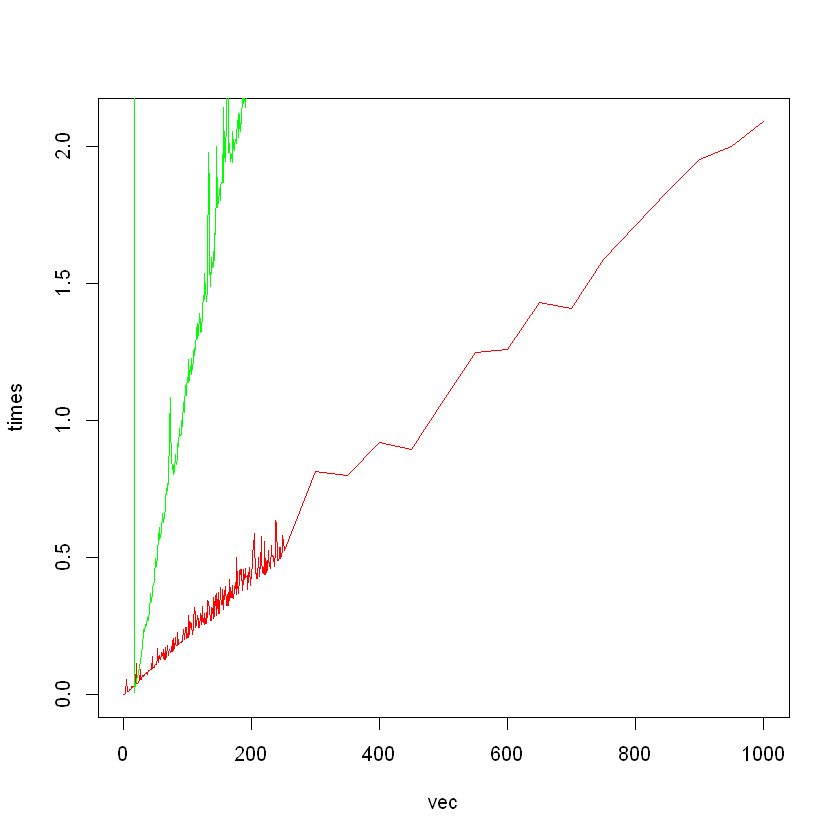

In [64]:
plot(vec,times,type="l",col="red")
lines(vec2,times2,col="green")


In [25]:
b = data.frame(fit_y_m,test_y)
b[,3] = abs(b[,2] - b[,1])

In [24]:
a = data.frame(fit_y,test_y)
a[,3] = abs(a[,2] - a[,1])

In [ ]:
sum(a[[3]])
sum(b[[3]]) #4160 with prepositions 251 without prepositions

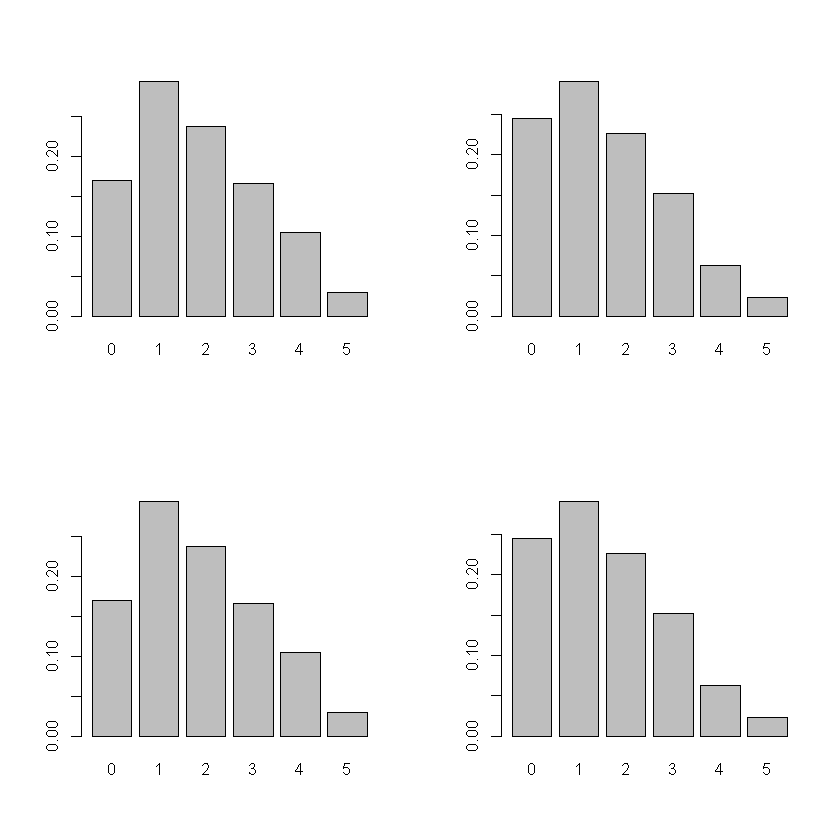

In [26]:
par(mfrow=c(2,2)) 

###########random
draw = sample(1:5, size=1025*20, replace = TRUE)
test_yfake = c()
for (i in 1:20){
    
    test_yfake = c(test_yfake, test_y)
    
}
df = data.frame(draw,test_yfake)
df[,3] = abs(df[,2] - df[,1])
barplot(prop.table(table(df[[3]])))
#################

barplot(prop.table(table(a[[3]])))


barplot(prop.table(table(df[[3]])))
#################

barplot(prop.table(table(b[[3]])))


In [ ]:
fit_y-fit_y_m

In [ ]:
b = data.frame(fit_y_m,test_y)
b[,3] = abs(b[,2] - b[,1])

In [29]:
par(mfrow=c(2,2)) 

###########random
draw = sample(1:5, size=1025*20, replace = TRUE)
test_yfake = c()
for (i in 1:20){
    
    test_yfake = c(test_yfake, test_y)
    
}
df = data.frame(draw,test_yfake)
df[,3] = abs(df[,2] - df[,1])
barplot(prop.table(table(a[[3]])))
#################

barplot(prop.table(table(b[[3]])))

ERROR: Error in `[[.default`(a, 3): indice fuori limite


In [ ]:
fit_y2 = c()
for (t in 1:train_dim){
#     print("start")
    words = str_split(train_x[t], " ")
    words = unlist(words, recursive=FALSE)
    score_t = c()
    
    for (c in C) {
        
        score = log(prior[c])
        for (w in words){
            if (w %in% vocab) {
                score = score + log(condprob[which(condprob[,7] == w), c ])
#                 print(log(condprob[which(condprob[,7] == w), c ]))
            }
        }
        
        score_t = c(score_t, score)
    }
#     print(score_t)
    label = which.max(score_t) - 1
    fit_y2 = c(fit_y2, label)
}

In [ ]:
b = data.frame(fit_y2,train_y)
b[,3] = abs(b[,2] - b[,1])

In [ ]:
barplot(prop.table(table(b[[3]])))

In [ ]:
length(b[,3])

In [ ]:
sum(b[,3]==0)/length(b[,3])

# Two words correlation

In [ ]:
text_tot = str_split(train_x, " ")
text_tot = unlist(text_tot, recursive=FALSE)
text_tot = tolower(text_tot)


remove = tolower(list("Says", "About","Above","Across","After","Ago","At","Below","By","Down","During","For","From","In","Into","Off",
                      "On", "it", "Over","Past","Since","Through","To","Under","Until","Up","With", "the", "That", "of", "a", "and", "is"))
text_tot = text_tot[! text_tot %in% c(remove)]

vocab2 = c()

for (i in 1:(length(text_tot)-1)) {
    
    vocab2 = c( vocab2, paste(toString(text_tot[i]) , toString(text_tot[i+1])) )
    
}
vocab2 = unique(vocab2)
length(vocab2)

In [ ]:
N_c = c()
prior = c()

T = c()
condprob = c()

for (c in C) {
    label = c-1    # le label sono 0,1,2,3,4,5
    train_c = train[which(train$Labels == label), ]   # dataframe con tutti i documenti di tipo c
    
    train_c_x = train_c[["Text"]]    # lista dei documenti di tipo c
#     vocab_c = str_split(train_c_x, " ")   # vocabolario delle parole che compaiono solo in documenti tipo c
#     vocab_c = unlist(vocab_c, recursive=FALSE)
    
    train_c_x = tolower(train_c_x)
    n_c = dim(train_c)[1]    # numero documenti di tipo c
    
    N_c = c(N_c, n_c)        # vettore con numero documenti
    prior = c(prior, n_c/N)
    
    T_c = c()                # Numeratore della probabilità
    
    for (ww in vocab2[1:30000]) {       # primo for sulle parole
    print(ww)
    mask = grepl(ww, train_c_x, fixed = TRUE)
        
    Nume = sum(mask)  
    
    T_c = c(T_c, Nume)    
        
    }

    print(c)
    dummy_sum = sum(T_c) + length(T_c)
    
    T = c(T, T_c)
    
    condprob_c = (T_c+1)/dummy_sum
    
    condprob = c(condprob, condprob_c )
    
    
}

dim(T) = c(length(vocab2[1:30000]), length(C))
# dim(condprob) = c(length(vocab2), length(C))
prior

In [ ]:
T = as.data.frame(T)
T[,7] = vocab2[1:30000]
names(T) = c(C-1,"word")
T

In [ ]:
dim(condprob) = c(length(vocab2[1:30000]), length(C))
condprob = as.data.frame(condprob)
condprob[,7] = vocab2[1:30000]
names(condprob) = c(C-1,"word")
condprob

In [ ]:
test_x = test[["Text"]]
test_y = test[["Labels"]]
dim = dim(test)[1]
dim

In [ ]:
fit_y = c()
for (t in 1:1){
#     print("start")
    words = str_split(test_x[t], " ")
    words = unlist(words, recursive=FALSE)
    
    vocab2t = c()

    for (i in 1:(length(words)-1)) {
    
    vocab2t = c( vocab2t, paste(toString(words[i]) , toString(words[i+1])) )
    
    }
    
    vocab2t = tolower(vocab2t)

    score_t = c()
    
    for (c in C) {
        
        score = log(prior[c])
        for (w in vocab2t){
            print(w %in% vocab2)
            print(w)
            if (w %in% vocab2) {
                
                score = score + log(condprob[which(condprob[,7] == w), c ])
#                 print(log(condprob[which(condprob[,7] == w), c ]))
            }
            
            
        }
        

        
        score_t = c(score_t, score)
    }
#     print(score_t)
    label = which.max(score_t) - 1
    fit_y = c(fit_y, label)
    

}

print(fit_y)

In [ ]:
a = data.frame(fit_y,test_y)
a[,3] = (a[,2] - a[,1])^2 == 0

In [ ]:

length(vocab2)

In [ ]:
tolower(train_x[1])

In [ ]:
vocab2[1]

In [ ]:
5 %in% c(5,6,7,8)

In [ ]:
oper = grepl('annies list', train_c_x, fixed = TRUE)
train_c_x[oper] 

In [ ]:
train_c = train[which(train$Labels == 1), ]   # dataframe con tutti i documenti di tipo c

train_c_x = tolower(train_c[["Text"]])    # lista dei documenti di tipo c
train_c_x

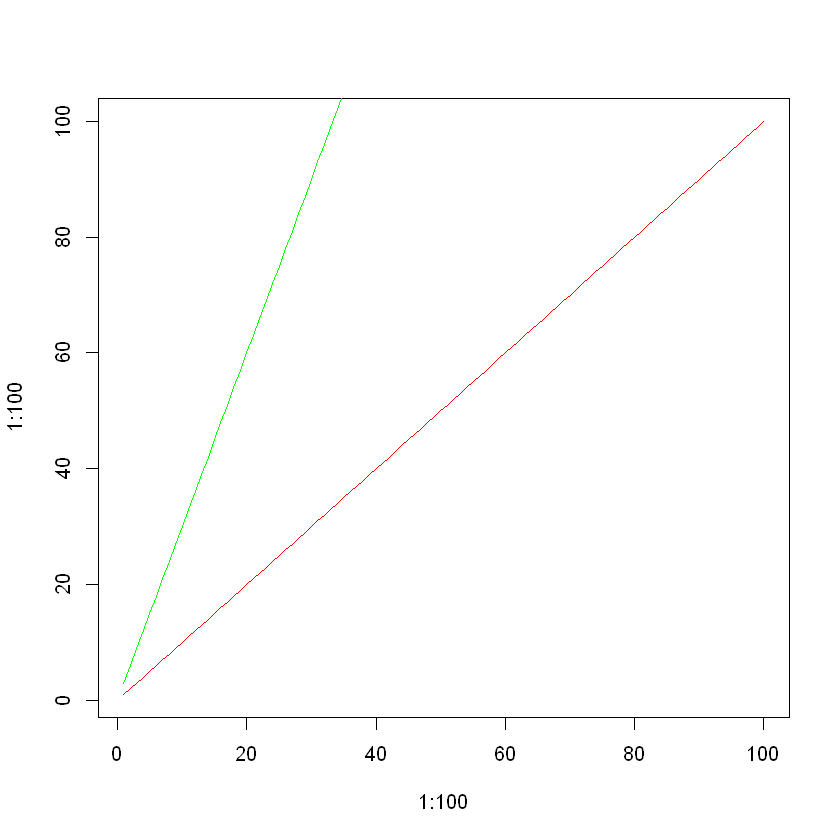

In [52]:
plot(1:100,1:100,type="l",col="red")
lines(1:100,1:100*3,col="green")

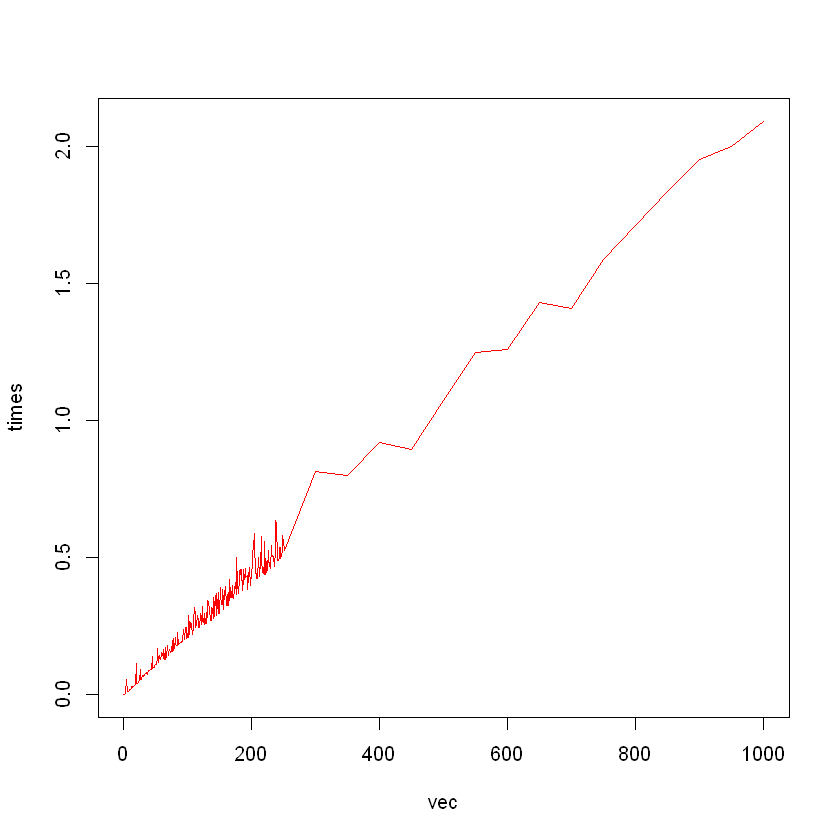

In [53]:
plot(vec,times,type="l",col="red")
lines(vec2,times2,col="green")